In [1]:
import numpy as np
import ruptures as rpt
import welly
import pandas as pd
import cp_comparitor as cp_Comp
import change_point_tools as cp_Tools
import well_tools as wtool
import test_func as tst
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.animation as anim

## Loading working paths and well data

In [2]:
path = '.\\volve_well_data\\'

#Well names lists for automation
_wellnames = ['1', '1A', '1B', '1C', '11A', '11T2']
#_wells = [f1, f1A, f1B, f1C, f11A, f11T2]
#_log_list = {'NPHI','RHOB','GR','DT','PEF', 'ROP', 'CALI'}
_log_list = ['NPHI','RHOB','GR','PEF', 'CALI']
_rollavglist = ['NPHI','RHOB','GR','PEF']


In [3]:
#setting global variables for the ruptures PELT parameters pen and min_size 
volve_15_9_complete = welly.Project.from_las([path + '15_9-F-1\\15_9_F1_complete.las',
                                    path + '15_9-F-1A\\15_9_F1A_complete.las',
                                    path + '15_9-F-1B\\15_9_F1B_complete.las',
                                    path + '15_9-F-1C\\15_9_F1C_complete.las',
                                    path + '15_9-F-11A\\15_9_F11A_complete.las',
                                    path + '15_9-F-11T2\\15_9_F11T2_complete.las',
                                    ])

#volve_15_9  
volve_15_9 = welly.Project.from_las([path + '15_9-F-1\\15_9_F1_complete.las',
                                    path + '15_9-F-1A\\15_9-F-1A.las',
                                    path + '15_9-F-1B\\15_9-F-1B.las',
                                    path + '15_9-F-1C\\15_9-F-1C.las',
                                    path + '15_9-F-11A\\15_9-F-11A.las',
                                    path + '15_9-F-11T2\\15_9_F11T2_complete.las',
                                    ])

#dictionary well objects

#f1A = welly.well.from_las(path + '15_9-F-1A\\15_9_F_1A_complete.las')
#f1B = welly.from_las(path + '15_9-F-1B\\15_9-F-1B_complete.las')
#f1C = welly.from_las(path + '15_9-F-1C\\15_9-F-1C_complete.las')
#f11A = welly.from_las(path + '15_9-F-11A\\15_9-F-11A_complete.las')
#f11T2 = welly.from_las(path + '15_9-F-11T2\\15_9-F-11T2_complete.las')
#Omitting f11B because this log does not have Completion data
#f11B = welly.Well.from_las(path + '15_9-F-11B\\15_9-F-11B_complete.las')

6it [00:12,  2.08s/it]
6it [00:10,  1.83s/it]


In [12]:
#UWI labels (Unique Well Identifier)  f1A.data['RPCELM_dS'] = f1A_RP.despike(z=1)
zed=1
#

for i in range(len(_wellnames)):
    volve_15_9_complete[i].add_header_item('uwi', _wellnames[i])
    volve_15_9[i].add_header_item('uwi', _wellnames[i])
#    for j in _log_list:
#        print(i,j)
#        volve_15_9_complete[i].data[j] = volve_15_9_complete[i].data[j].despike(z=zed)


####Well        Lat         Long
####15/9-F-1	58.441642	1.887419
####15/9-F-1 A	58.441642	1.887419
####15/9-F-1 B	58.441642	1.887419
####15/9-F-1 C	58.441642	1.887419
####15/9-F-11	58.441656	1.887464
####15/9-F-11 A	58.441656	1.887464
####15/9-F-11 B	58.441656	1.887464


In [13]:
#UWI Checks
#volve_15_9_complete
#volve_15_9
key=['DEPTH TVD']
#for i in range(1,(len(_wellnames)-1)): 
volve_wells = volve_15_9.merge_wells(volve_15_9_complete, keys=key)
#welly.Project.merge_wells??

In [6]:
#volve_wells[5].data['GRdS'] = volve_15_9[5].data['GR'].despike()  # Despiked GR for 11T2
#volve_wells[5].data['GRdIFF'] = volve_15_9[5].data['GR'] - volve_wells[5].data['GRdS']
#volve_wells[5].plot(tracks=['GR', 'GRdS', 'GRdIFF'])

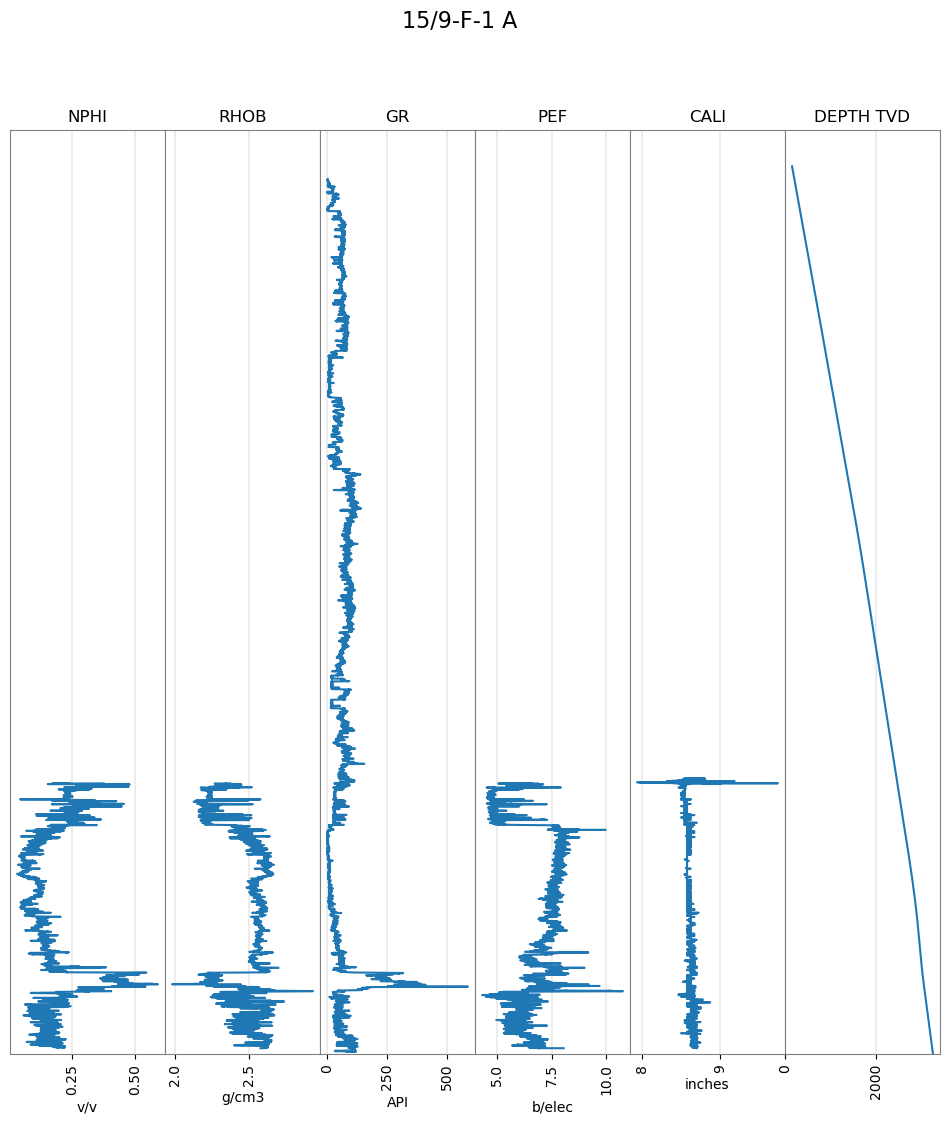

In [16]:
#volve_15_9.plot_map()
_total_list = ['NPHI','RHOB','GR','PEF', 'CALI', 'DEPTH TVD']
volve_wells[1].plot(tracks=_total_list)
#volve_wells

#### Combining well logs into Welly Project and 
Deliminating Dictionaries and parameter variables, controlling for outliers, evaluating log
completeness for geospatial and vertical extents, which will be needed for future features.

In [11]:
zed = 1

f1A.data['RPCELM_dS'] = f1A.data['RPCELM'].despike(z=zed)

NameError: name 'f1A' is not defined

In [10]:
#Rolling average parameters, for pandas function.

window = 30
periods = 3

#setting global variables for the ruptures PELT parameters pen and min_size 
RHOB_glob_pen = 0.5
RHOB_glob_min = 10

NPHI_glob_pen = 0.1
NPHI_glob_min = 10

GR_glob_pen = 1300
GR_glob_min = 10


#string label varables
dataGR = "GR"
dataRHOB = "RHOB"
dataNPHI = "NPHI"



#Dictionaries for log extents

_extent_min = {'f1': 2600, 'f1A' : 2620, 'f1B' : 3100 , 'f1C': 3100 , 'f11A' : 2600 , 'f11T2': 3200 }
_extent_max = {'f1': 4000, 'f1A' : 3600, 'f1B' : 3400 , 'f1C': 4100 , 'f11A' : 3700 , 'f11T2': 4550 }
_log_extent_min = {0 : 2620, 1 : 3100 , 2: 3100 , 3 : 2600 , 4: 3200 }
_log_extent_max = {0: 3600, 1 : 3400 , 2: 4100 , 3 : 3700 , 4: 4550 }

### Loading wells into dataframes, and computing rolling averages

In [9]:
# Writing well log values to dataframe, index is MD(measured depth)
df_f1 = volve_wells[0].df(_total_list)
df_f1A = volve_wells[1].df(_total_list)
df_f1B = volve_wells[2].df(_total_list)
df_f1C = volve_wells[3].df(_total_list)
df_f11A = volve_wells[4].df(_total_list)
#df_f11B = _wells[5].df(_log_list)
df_f11T2 = volve_wells[5].df(_total_list)

# these help from creating redundancies in the dataframes 
# data_f1 = []
# data_f1A = []
# data_f1B = []
# data_f1C = []
# data_f11A = []
# data_f11T2 = []

# computing rolling averages for the logs (these can be more useful for changepoint detection)
# data_f1 = wtool.compute_all_rolling_avg(df_f1, window=30, periods=3)
# data_f1A = wtool.compute_all_rolling_avg(df_f1A, window=30, periods=3)
# data_f1B = wtool.compute_all_rolling_avg(df_f1B, window=30, periods=3)
# data_f1C = wtool.compute_all_rolling_avg(df_f1C, window=30, periods=3)
# data_f11A = wtool.compute_all_rolling_avg(df_f11A, window=30, periods=3)
# data_f11T2 = wtool.compute_all_rolling_avg(df_f11T2, window=30, periods=3)

c:\Users\ada55080\.conda\envs\sdt\lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\ada55080\.conda\envs\sdt\lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\ada55080\.conda\envs\sdt\lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\ada55080\.conda\envs\sdt\lib\site-packages\welly\curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
c:\Users\ada55080\.conda\envs\sdt\lib\site-packages\welly\cu

In [17]:
def normalize_array(arr, low_clip, high_clip): 
    '''created through CHATGPT-4
    text input:

    build a python function that normalizes a numpy 
    array to values between zero and one as inputs takes in an 
    array to normalize, and two clipping percentage parameters 
    one for the high end and one for the low end'''

    # Calculate the lower and upper percentile values
    low_value = np.percentile(arr, low_clip)
    high_value = np.percentile(arr, 100 - high_clip)
    
    # Clip the array values based on the percentiles
    clipped_arr = np.clip(arr, low_value, high_value)
    
    # Normalize the clipped array to values between zero and one
    normalized_arr = (clipped_arr - low_value) / (high_value - low_value)
    
    return normalized_arr

### DF testing to see that they are indeed complete for CP analysis

<Axes: xlabel='DEPTH'>

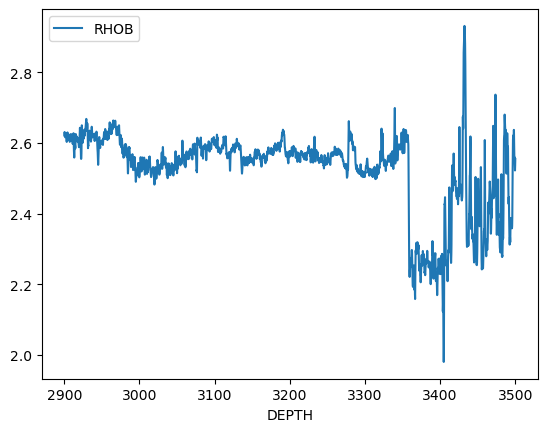

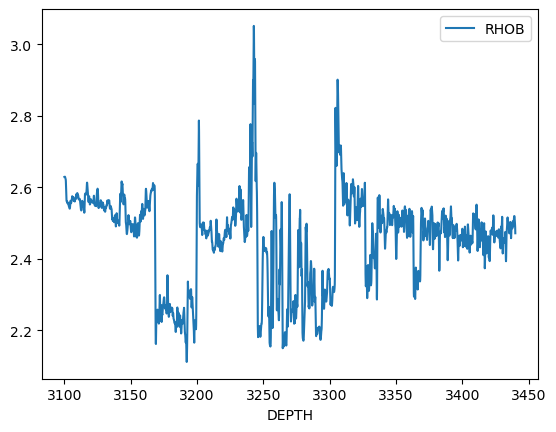

In [24]:
df_f1A[['RHOB']][2900:3500].plot()
#df_f1A.plot()
df_f1B[['RHOB']][3100:3440].plot()
#df_f1C.plot()
#df_f11A.plot()
#df_f11T2.plot() 


In [25]:
np.where(np.isnan(df_f1B[['GR']][3100:3500].to_numpy()))

(array([3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3581,
        3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592,
        3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603,
        3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614,
        3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625,
        3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636,
        3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647,
        3648], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

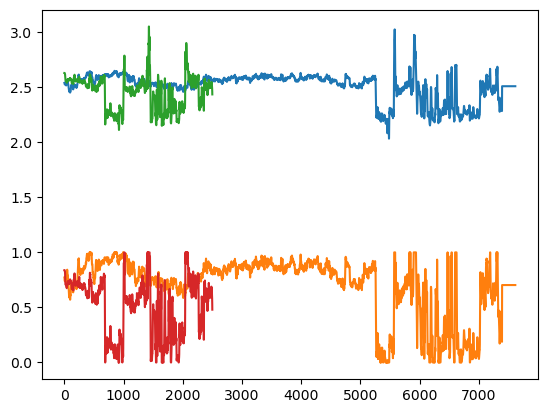

In [31]:
# Proofing locations
import librosa.sequence as ls
import librosa

x = wtool.remove_nan(df_f11A[['RHOB']][3000:3900].to_numpy())
y = wtool.remove_nan(df_f1B[['RHOB']][3100:3350].to_numpy())

X = normalize_array(x, 2, 2)
Y = normalize_array(y, 2, 2)

plt.plot(x)
plt.plot(X)
plt.plot(y)
plt.plot(Y)

#match = ls.dtw(df_f1B_GR.T,df_f1A_GR.T)

[(0.0, 1.0), (0.0, 2.0), Text(0.5, 1.0, 'Matching cost function')]

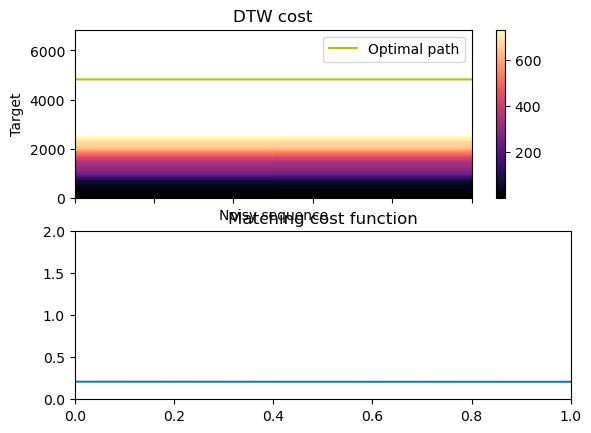

In [32]:
#plt.plot(match[0])
#y, sr = librosa.load(librosa.ex('brahms'), offset=10, duration=15)
#X = librosa.feature.chroma_cens(y=y, sr=sr)
#noise = np.random.rand(X.shape[0], 200)
#Y = np.concatenate((noise, noise, X, noise), axis=1)
D, wp = librosa.sequence.dtw(X.T, Y.T, subseq=True)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(D, x_axis='frames', y_axis='frames',
                               ax=ax[0])
ax[0].set(title='DTW cost', xlabel='Noisy sequence', ylabel='Target')
ax[0].plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
ax[0].legend()
fig.colorbar(img, ax=ax[0])
ax[1].plot(D[-1, :] / wp.shape[0])
ax[1].set(xlim=[0, Y.shape[1]], ylim=[0, 2],
          title='Matching cost function')

In [19]:
def split_dataset(dataset, segment_size):
    '''Tool to divide dataset into smaller segments, 
    
    takes input parameters:  dataset and segment size 
    outputs series of arrays with index [0] as the segment count
    and index [1] and [2] as the start and end respectively of the
    segments chunks, these refer to the index in the input dataset 
    
    segments chunks will be equal length any incomplete segments will 
    exist as the last segment'''

    segments = []
    current_segment = []
    segment_num = 0

    for idx, item in enumerate(dataset):
        current_segment.append(item)
        if len(current_segment) == segment_size:
            segment_num += 1
            segments.append([segment_num, idx - segment_size + 1, idx+1])
            current_segment = []

    if current_segment:
        segment_num += 1
        segments.append([segment_num, len(dataset) - len(current_segment), len(dataset)])

    return segments

# Example usage:

datata = [0,1,2,3,4,5,6,4,4,4,4,7,8,4,4,4,4,4,10]
result = split_dataset(datata, segment_size=3)
result

#result = split_dataset(df_f1A_gr, 5000)
#result
#for segment in result:
#    print(segment)

#seg = 'seg'+str(2)

#seg

[[1, 0, 3],
 [2, 3, 6],
 [3, 6, 9],
 [4, 9, 12],
 [5, 12, 15],
 [6, 15, 18],
 [7, 18, 19]]

In [26]:
df_f1A_gr = wtool.fill_out_data_ends(df_f1A['GR'].values)

df_f1A_gr = wtool.remove_nan(df_f1A_gr)

#nan = np.where(np.isnan(df_f1A_gr))
#nan


# def bayes_offline_split(data, sequence_length=5000, **kwargs):
    
#     if len(data) <= sequence_length:
#         cp_Tools.bayes_offline_sdt(data.T)
#     else:
#         split = split_dataset(data, sequence_length)
    
#     full_prob = []
    
#     for segment in split:
#         #print(segment)
#         seg_prob = bayes_offline_sdt(data[segment[1]:segment[2]].T)
#         full_prob = np.concatenate((full_prob, seg_prob))
#         print('completed segment ' + str(segment[0]) + ' from' + str(segment[1]) + ': ' + str(segment[2])+ ' of ' + str(len(data)))
    
#     return full_prob
#df_f1A_gr[1805:1830] = df_f1A_gr[1804]
#df_f1A_gr[2354:2405] = df_f1A_gr[2405]
#df_f1A_gr[7539:7561] = df_f1A_gr[7561]
#np.where(np.isnan(df_f1A_gr))
#GR_cp = cp_Tools.bayes_offline_sdt(df_f1A_gr[:5000].T)
#GR_cp2 = cp_Tools.bayes_offline_sdt(df_f1A_gr[5000:10000].T)
#GR_cp3 = cp_Tools.bayes_offline_sdt(df_f1A_gr[10000:15000].T)
#print('3')
#GR_cp4 = cp_Tools.bayes_offline_sdt(df_f1A_gr[15000:20000].T)
#GR_cp5 = cp_Tools.bayes_offline_sdt(df_f1A_gr[20000:25000].T)
#GR_cp6 = cp_Tools.bayes_offline_sdt(df_f1A_gr[25000:30000].T)
#print('6')
#GR_cp7 = cp_Tools.bayes_offline_sdt(df_f1A_gr[30000:35000].T)
#GR_cp8 = cp_Tools.bayes_offline_sdt(df_f1A_gr[35000:].T)

#CpPr_f1A_GR = np.concatenate((GR_cp, GR_cp2, GR_cp3, GR_cp4, GR_cp5, GR_cp6, GR_cp7, GR_cp8))

cp_total = cp_Tools.bayes_offline_split(df_f1A_gr, sequence_length=1000)

None None None None None
completed segment 1 from0: 999 of 35361
None None None None None
completed segment 2 from1000: 1999 of 35361
None None None None None
completed segment 3 from2000: 2999 of 35361
None None None None None
completed segment 4 from3000: 3999 of 35361
None None None None None
completed segment 5 from4000: 4999 of 35361
None None None None None
completed segment 6 from5000: 5999 of 35361
None None None None None
completed segment 7 from6000: 6999 of 35361
None None None None None
completed segment 8 from7000: 7999 of 35361
None None None None None
completed segment 9 from8000: 8999 of 35361
None None None None None
completed segment 10 from9000: 9999 of 35361
None None None None None
completed segment 11 from10000: 10999 of 35361
None None None None None
completed segment 12 from11000: 11999 of 35361
None None None None None
completed segment 13 from12000: 12999 of 35361
None None None None None
completed segment 14 from13000: 13999 of 35361
None None None None None


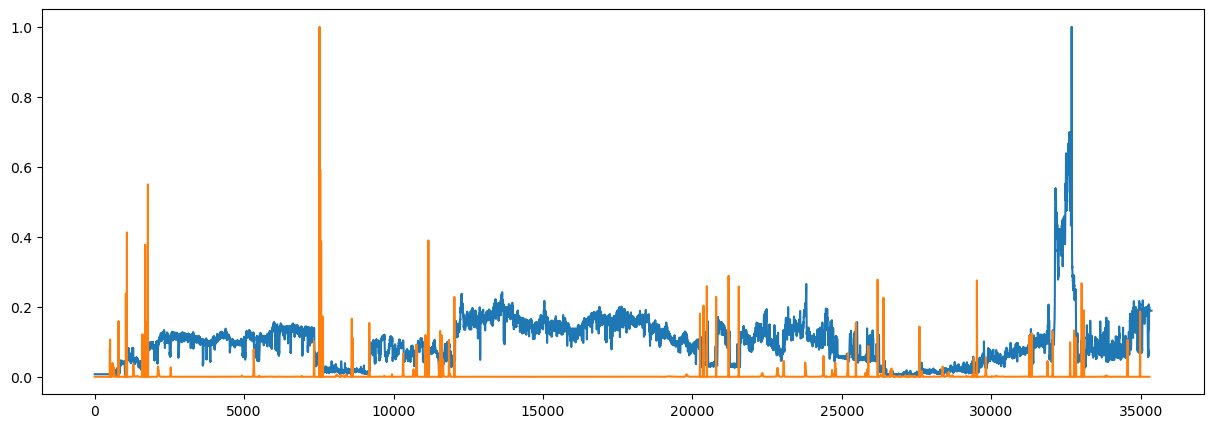

In [15]:
plt.figure(figsize=(15,5))
#plt.plot(np.concatenate((GR_cp, GR_cp2, GR_cp3, GR_cp4, GR_cp5, GR_cp6, GR_cp7, GR_cp8)))
plt.plot(df_f1A_gr/(df_f1A_gr.max()))
plt.plot(cp_total)

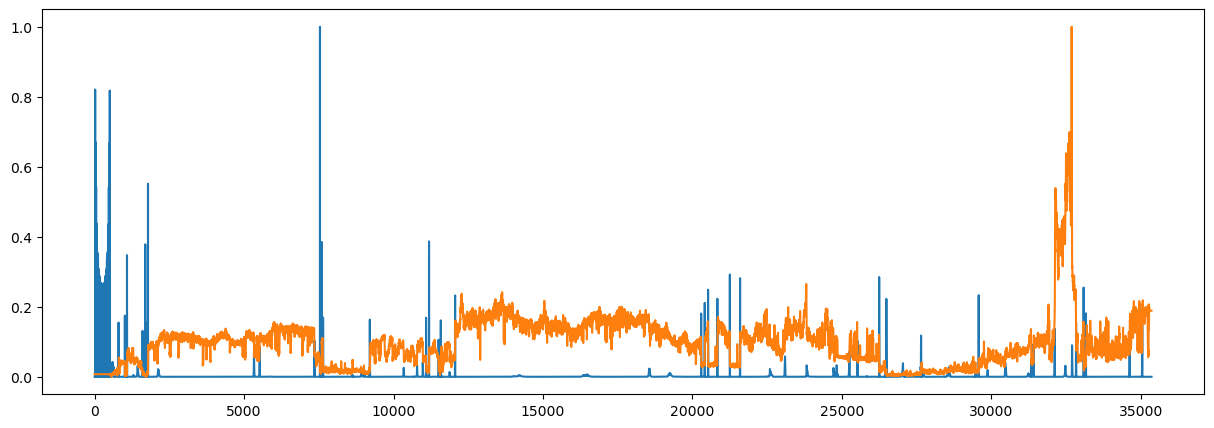

In [36]:
plt.figure(figsize=(15,5))
#plt.plot(np.concatenate((GR_cp, GR_cp2, GR_cp3, GR_cp4, GR_cp5, GR_cp6, GR_cp7, GR_cp8)))
plt.plot(df_f1A_gr/(df_f1A_gr.max()))

In [42]:
df_f1A_RHOB = wtool.fill_out_data_ends(df_f1A['RHOB'][_extent_min['f1A']:].values)

df_f1A_RHOB = wtool.remove_nan(df_f1A_RHOB)

df_f1A['RHOB_prob_3000'] = np.concatenate((np.zeros(len(_extent_min['f1A']), cp_Tools.bayes_offline_split(df_f1A_RHOB, sequence_length=500))))

#df_f1A[['RHOB_prob_3000']].plot(figsize=(10,5))
plt.plot(df_f1A['RHOB_prob_3000'], alpha=0.4)
plt.plot(df_f1A_RHOB/df_f1A_RHOB.max(), alpha=0.6)

None None None None None
completed segment 1 from0: 500 of 10619
None None None None None
completed segment 2 from500: 1000 of 10619
None None None None None
completed segment 3 from1000: 1500 of 10619
None None None None None
completed segment 4 from1500: 2000 of 10619
None None None None None
completed segment 5 from2000: 2500 of 10619
None None None None None
completed segment 6 from2500: 3000 of 10619
None None None None None
completed segment 7 from3000: 3500 of 10619
None None None None None
completed segment 8 from3500: 4000 of 10619
None None None None None
completed segment 9 from4000: 4500 of 10619
None None None None None
completed segment 10 from4500: 5000 of 10619
None None None None None
completed segment 11 from5000: 5500 of 10619
None None None None None
completed segment 12 from5500: 6000 of 10619
None None None None None
completed segment 13 from6000: 6500 of 10619
None None None None None
completed segment 14 from6500: 7000 of 10619
None None None None None
completed

ValueError: Length of values (36819) does not match length of index (35361)

In [82]:
import sdt.changepoint as sdt

np.random.seed(123)
# Make some data with a changepoint at t = 10
data = np.concatenate([np.random.normal(1.5, 0.1, 10),
                          np.random.normal(0, 0.1, 10)])

det = sdt.BayesOnline()
output = det.find_changepoints(df_f1A_gr, 300, 0.21)


#array([10])

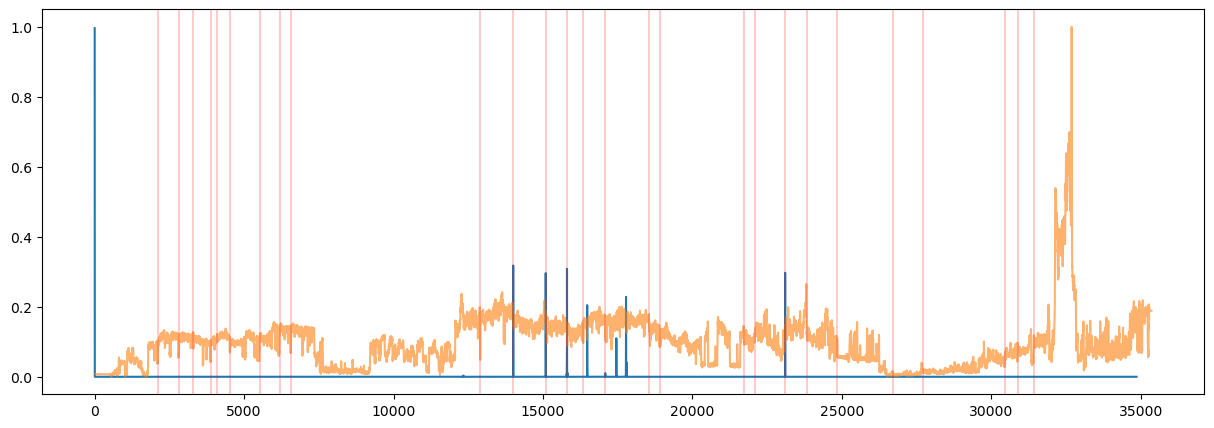

In [83]:
#output
prob= det.get_probabilities(500)
plt.figure(figsize=(15,5))
plt.plot(prob)
plt.plot(df_f1A_gr/df_f1A_gr.max(), alpha=0.6)
for i in output:
    plt.axvline(i, color='r', alpha=0.2)

In [72]:
det.find_changepoints()

Signature: det.find_changepoints(data, past=3, prob_threshold=None)
Source:   
    def find_changepoints(self, data, past=3, prob_threshold=None):
        """Analyze dataset

        This resets the detector and calls :py:meth:`update` on all data
        points.

        Parameters
        ----------
        data : array-like
            Dataset
        past : int, optional
            How many datapoints into the past to look. Larger values will
            increase robustness, but also latency, meaning that if `past`
            equals some number `x`, a changepoint within the last `x` data
            points cannot be detected. Defaults to 3.
        prob_threshold : float or None, optional
            If this is a float, local maxima in the changepoint probabilities
            are considered changepoints, if they are above the threshold. In
            that case, an array of changepoints is returned. If `None`,
            an array of probabilities is returned. Defaults to `None`